# **Loading the dataset**

In [2]:
import numpy as np
import random
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

**MNIST daytaset has been used**

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Reshaping the data**

In [4]:
x_train = x_train.reshape((60000,784))

In [5]:
x_test = x_test.reshape((10000,784))

Truncating data set to make smaller data set because of limitation in computational resources.

In [6]:
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:200]
y_test = y_test[:200]

# **Using SVM without hyperparameter tuning**

In [ ]:
svm_linear = svm.SVC()
svm_linear.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Test Accuracy**

In [ ]:
test_accuracy = svm_linear.score(x_test,y_test)
print("Test Accuaracy:",test_accuracy)

Test Accuaracy: 0.93


**Confusion Matrix**

In [ ]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 1  0  9  1  1  0  2  2  0  0]
 [ 1  1  1 11  0  1  0  0  1  0]
 [ 1  0  1  1 24  0  0  0  0  1]
 [ 0  0  0  2  2 14  0  1  0  1]
 [ 0  0  2  0  3  0 14  0  0  1]
 [ 0  0  2  1  0  0  0 20  1  0]
 [ 0  0  1  0  0  1  0  0  8  0]
 [ 0  0  0  1  4  0  0  2  1 13]]


**Classification report**

In [ ]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.97      1.00      0.98        28
           2       0.56      0.56      0.56        16
           3       0.65      0.69      0.67        16
           4       0.71      0.86      0.77        28
           5       0.88      0.70      0.78        20
           6       0.88      0.70      0.78        20
           7       0.80      0.83      0.82        24
           8       0.73      0.80      0.76        10
           9       0.81      0.62      0.70        21

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.80      0.79      0.79       200



# **Using Random Forest Classifier without hyperparameter tuning**

In [ ]:
rf_cf = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
pred_y_test=rf_cf.predict(x_test)

**Accuracy on test data**

In [ ]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

0.79


**Confusion Matrix**

In [ ]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 1  0  9  1  1  0  2  2  0  0]
 [ 1  1  1 11  0  1  0  0  1  0]
 [ 1  0  1  1 24  0  0  0  0  1]
 [ 0  0  0  2  2 14  0  1  0  1]
 [ 0  0  2  0  3  0 14  0  0  1]
 [ 0  0  2  1  0  0  0 20  1  0]
 [ 0  0  1  0  0  1  0  0  8  0]
 [ 0  0  0  1  4  0  0  2  1 13]]


**Classification Report**

In [ ]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.97      1.00      0.98        28
           2       0.56      0.56      0.56        16
           3       0.65      0.69      0.67        16
           4       0.71      0.86      0.77        28
           5       0.88      0.70      0.78        20
           6       0.88      0.70      0.78        20
           7       0.80      0.83      0.82        24
           8       0.73      0.80      0.76        10
           9       0.81      0.62      0.70        21

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.80      0.79      0.79       200



# **Grid Search**

In this approach, a grid of possible values of hyperparameters is defined. Grid contains all the combinations of different hyperparmeters defined by the coder. 

Then model is constructed for every set in grid.
This techniques follows simple concept: "Try everything you can"

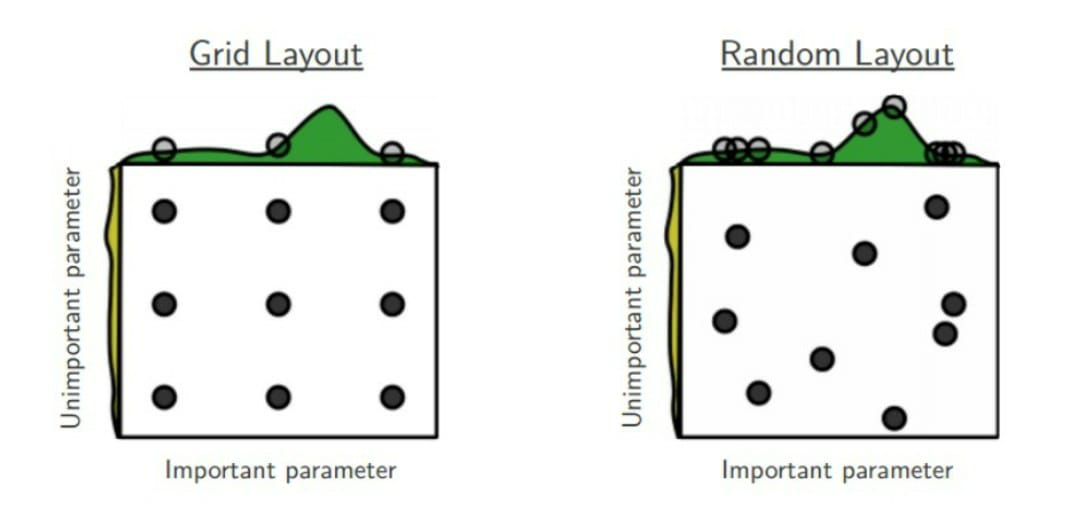

In [8]:
 from PIL import Image
 img  = Image.open('grid_random_layout.jpeg')
 img

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# Defining grid for grid search
n_estimators = [10, 100, 200, 300]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 100, 200]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
criterion = ['entropy','gini']


grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion': criterion}

In [13]:
rf_cf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf_cf, param_grid=grid, cv=2, n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.6min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [15]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
grid_optimal=grid_search.best_estimator_

In [17]:
#Predicting on x_test using optimal model
pred_y_test=grid_optimal.predict(x_test)

**Accuracy**

In [18]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

Test Accuaracy: 0.915


**Confusion Matrix**

In [19]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)


[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  1  0  0  1  0  0]
 [ 1  0  1 12  0  1  0  1  0  0]
 [ 0  0  0  0 26  0  0  0  0  2]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  1  0  1  0 18  0  0  0]
 [ 0  1  0  1  1  0  0 20  0  1]
 [ 0  0  1  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  1 20]]


**Classification Report**

In [20]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.97      1.00      0.98        28
           2       0.78      0.88      0.82        16
           3       0.92      0.75      0.83        16
           4       0.90      0.93      0.91        28
           5       0.95      0.95      0.95        20
           6       1.00      0.90      0.95        20
           7       0.91      0.83      0.87        24
           8       0.90      0.90      0.90        10
           9       0.87      0.95      0.91        21

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



**SVM**

In [38]:
kernel = ['linear', 'poly' , 'rbf']
C = [1,5,10,100]
tol = [0.001, 0.01, 0.1]
gamma = ['scale','auto']

grid_SVM = { 'kernel' : kernel,
            'C': C,
            'tol' : tol,
            'gamma' : gamma} 

In [39]:
svm_cf = svm.SVC()
grid_search=GridSearchCV(estimator=svm_cf, param_grid=grid_SVM, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   35.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [45]:
grid_search.best_estimator_


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.1,
    verbose=False)

In [46]:
grid_optimal=grid_search.best_estimator_

In [47]:
pred_y_test=grid_optimal.predict(x_test)

**Accuracy**

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

In [49]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

Test Accuaracy: 0.935


**Confusion Matrix**

In [50]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  1  0  0  1  0  0]
 [ 0  0  1 12  0  3  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  2  0  1  0 17  0  0  0]
 [ 0  0  0  0  1  0  0 22  0  1]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  1  0  0  0  0 20]]


**Classification Report**

In [51]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       0.78      0.88      0.82        16
           3       1.00      0.75      0.86        16
           4       0.88      1.00      0.93        28
           5       0.86      0.95      0.90        20
           6       1.00      0.85      0.92        20
           7       0.96      0.92      0.94        24
           8       1.00      1.00      1.00        10
           9       0.95      0.95      0.95        21

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



# **Random Search**

Random Search is basic improvement over grid search, where instead of going brute forcely on defined search space we can define a bigger(more values) search space and try random combination from it.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#Defining grid for random search
n_estimators = [10, 100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 100, 200, 300, 400, 500]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
criterion = ['entropy','gini']


r_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion': criterion}

print(r_grid)

{'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


In [54]:
rf_cf=RandomForestClassifier()
rf_randomSearch=RandomizedSearchCV(estimator=rf_cf,param_distributions=r_grid,n_iter=20,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomSearch.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
rf_randomSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [56]:

random_grid_optimal = rf_randomSearch.best_estimator_

In [57]:

pred_y_test=random_grid_optimal.predict(x_test)


**Accuracy**

In [58]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

Test Accuaracy: 0.905


**Confusion Matrix**

In [59]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  1  0  0  2  0  0]
 [ 0  0  0 15  0  0  0  1  0  0]
 [ 0  0  0  0 26  0  0  0  0  2]
 [ 0  0  0  0  2 18  0  0  0  0]
 [ 1  0  1  0  1  0 17  0  0  0]
 [ 0  2  0  0  0  0  0 21  0  1]
 [ 0  0  1  0  0  0  0  0  8  1]
 [ 0  0  0  0  2  0  0  1  0 18]]


**Classification Report**

In [60]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.93      1.00      0.97        28
           2       0.87      0.81      0.84        16
           3       1.00      0.94      0.97        16
           4       0.81      0.93      0.87        28
           5       1.00      0.90      0.95        20
           6       1.00      0.85      0.92        20
           7       0.84      0.88      0.86        24
           8       1.00      0.80      0.89        10
           9       0.82      0.86      0.84        21

    accuracy                           0.91       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.91      0.91      0.91       200



**SVM**

In [61]:
kernel = ['linear', 'poly' , 'rbf']
C = [1,5,10,100]
tol = [0.001, 0.01, 0.1]
gamma = ['scale','auto']

grid_SVM = { 'kernel' : kernel,
            'C': C,
            'tol' : tol,
            'gamma' : gamma} 

In [62]:
svm_cf = svm.SVC()
svm_random_search=RandomizedSearchCV(estimator=svm_cf,param_distributions=grid_SVM,n_iter=20, cv=2,n_jobs=-1,verbose=2,random_state=100)
svm_random_search.fit(x_train,y_train)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.7s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf'],
                                        'tol': [0.001, 0.01, 0.1]},
                   pre_dispatch='2*n_jobs', random_state=100, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [64]:
svm_random_search.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.1}

In [65]:
random_grid_optimal = svm_random_search.best_estimator_

In [67]:
#Predicting y on test data using model with optimal hyperparameters
pred_y_test=random_grid_optimal.predict(x_test)

**Accuracy**

In [68]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

Test Accuaracy: 0.955


**Confusion Matrix**

In [69]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  1  0  0  0  0  0]
 [ 0  0  0 14  0  2  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  2]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 21]]


**Classication Report**

In [70]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       0.83      0.94      0.88        16
           3       1.00      0.88      0.93        16
           4       0.96      0.93      0.95        28
           5       0.90      0.95      0.93        20
           6       1.00      0.90      0.95        20
           7       1.00      0.96      0.98        24
           8       1.00      1.00      1.00        10
           9       0.88      1.00      0.93        21

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



# **Bayesion Optimization on Random forest and SVM Classifier**

Bayesion Optimization keeps track of past evaluation, and tries to learn from it by making a probablistic model, which maps hyperparameters to a probability score on the objective function. This model is called "Surrogate ". The surrogate can be easily(less computationaly expensively) optimized as compared to the actual objective function. Therefore, hyperparameters that performs well on surrogate is found and then they are applied to the true objective function. Surrogate is updated according to the results in every iteration and this process continues till the defined constraints.

For deciding the next hyperparamater configuration, Acquisition function is used.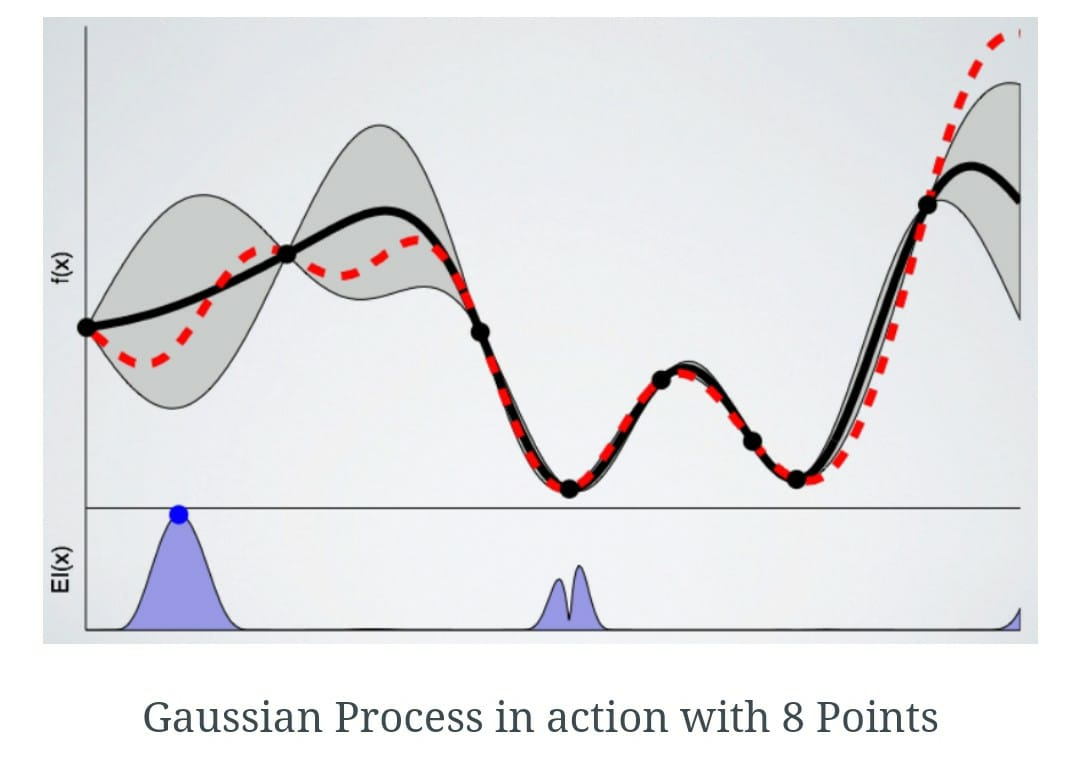

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [ ]:
search_space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.choice('max_depth', [10, 100, 200, 300, 400, 500]),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2']),
        'min_samples_leaf': hp.choice('min_samples_leaf',[1, 2, 4]),
        'min_samples_split' : hp.choice ('min_samples_split', [2, 5, 10]),
        'n_estimators' : hp.choice('n_estimators', [10, 100, 200, 300, 400, 500])
    }

In [ ]:
def run_model(search_space):
    rf_cf = RandomForestClassifier(criterion = search_space['criterion'], 
                                 max_depth = search_space['max_depth'],
                                 max_features = search_space['max_features'],
                                 min_samples_leaf = search_space['min_samples_leaf'],
                                 min_samples_split = search_space['min_samples_split'],
                                 n_estimators = search_space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(rf_cf, x_train, y_train, cv = 3).mean()

    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:

trials = Trials()
optimal_hyperparameters = fmin(fn= run_model,
                                space= search_space,
                                algo= tpe.suggest,
                                max_evals = 50,
                                trials= trials)
optimal_hyperparameters

100%|██████████| 50/50 [04:27<00:00,  5.35s/it, best loss: -0.889]


{'criterion': 1,
 'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 0,
 'min_samples_split': 0,
 'n_estimators': 5}

In [ ]:
# space_grid 
n_estimators = [10, 100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 100, 200, 300, 400, 500]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
criterion = ['entropy','gini']

In [ ]:
rf_cf_optimal = RandomForestClassifier(criterion = criterion[optimal_hyperparameters['criterion']],
                                       max_depth = max_depth[optimal_hyperparameters['max_depth']], 
                                       max_features = max_features[optimal_hyperparameters['max_features']], 
                                       min_samples_leaf = min_samples_leaf[optimal_hyperparameters['min_samples_leaf']], 
                                       min_samples_split = min_samples_split[optimal_hyperparameters['min_samples_split']], 
                                       n_estimators = n_estimators[optimal_hyperparameters['n_estimators']]).fit(x_train,y_train)
pred_y_test = rf_cf_optimal.predict(x_test)


[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  1  0  0  1  0  0]
 [ 0  1  0 14  0  0  0  1  0  0]
 [ 0  0  0  0 26  0  0  0  0  2]
 [ 0  0  1  0  1 18  0  0  0  0]
 [ 0  0  2  0  2  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1]
 [ 0  0  1  0  0  0  0  0  9  0]
 [ 0  0  0  0  1  0  0  1  0 19]]
0.92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.97      1.00      0.98        28
           2       0.78      0.88      0.82        16
           3       1.00      0.88      0.93        16
           4       0.84      0.93      0.88        28
           5       1.00      0.90      0.95        20
           6       1.00      0.80      0.89        20
           7       0.88      0.96      0.92        24
           8       1.00      0.90      0.95        10
           9       0.86      0.90      0.88        21

    accuracy                           0.92       200
   macro avg  

**Accuracy**

In [ ]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

**Confusion Matrix**

In [ ]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

**Classification Report**

In [ ]:
report = classification_report(y_test,pred_y_test)
print(report)

**SVM**

In [ ]:
search_space = {'kernel': hp.choice('kernel', ['linear', 'poly' , 'rbf']),
        'C': hp.choice('C', [1,5,10,100]),
        'tol': hp.choice('tol', [0.001, 0.01, 0.1]),
        'gamma': hp.choice('gamma',['scale','auto'])       
    }


In [ ]:
def run_model(search_space):
    model = svm.SVC(kernel = search_space['kernel'],
                    C = search_space['C'],
                    tol = search_space['tol'],
                    gamma = search_space['gamma']
                    )
    
    accuracy = cross_val_score(model, x_train, y_train, cv = 3).mean()

    
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
optimal_hyperparameters = fmin(fn= run_model,
            space= search_space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials)
optimal_hyperparameters

100%|██████████| 50/50 [01:36<00:00,  1.92s/it, best loss: -0.8980117842393293]


{'C': 1, 'gamma': 0, 'kernel': 2, 'tol': 0}

In [ ]:
kernel = ['linear', 'poly' , 'rbf']
C = [1,5,10,100]
tol = [0.001, 0.01, 0.1]
gamma = ['scale','auto']

grid_SVM = { 'kernel' : kernel,
            'C': C,
            'tol' : tol,
            'gamma' : gamma} 

In [ ]:
optimal_svm= svm.SVC(kernel = kernel[optimal_hyperparameters['kernel']],
                     C= C[optimal_hyperparameters['C']], 
                    tol =tol[optimal_hyperparameters['tol']], 
                    gamma = gamma[optimal_hyperparameters['gamma']]
                    ).fit(x_train,y_train)
y_pred_test = optimal_svm.predict(x_test)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  1  0  0  0  0  0]
 [ 0  0  0 14  0  2  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  1]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 21]]
0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       0.83      0.94      0.88        16
           3       1.00      0.88      0.93        16
           4       0.96      0.96      0.96        28
           5       0.90      0.95      0.93        20
           6       1.00      0.90      0.95        20
           7       1.00      0.96      0.98        24
           8       1.00      1.00      1.00        10
           9       0.91      1.00      0.95        21

    accuracy                           0.96       200
   macro avg  

**Accuracy**

In [ ]:
test_accuracy = accuracy_score(y_test,pred_y_test)
print("Test Accuaracy:",test_accuracy)

**Confusion Matrix**

In [ ]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

**Classifaction Report**

In [ ]:
report = classification_report(y_test,pred_y_test)
print(report)

# **Genetic Algorithm on Random Forest and SVM Classifier**

Genetic Algorithms are inspired by Charles Darwin's theory: "Natural selection is survival of the fittest".

Genetic algorithms are a type of evolutionary algorithm. Evolutionary algorithms are inspired by biological concepts such as mutation, evolution, reproduction. Genetic Algorithms  try to apply natural selection mechanisms to machine learning context.
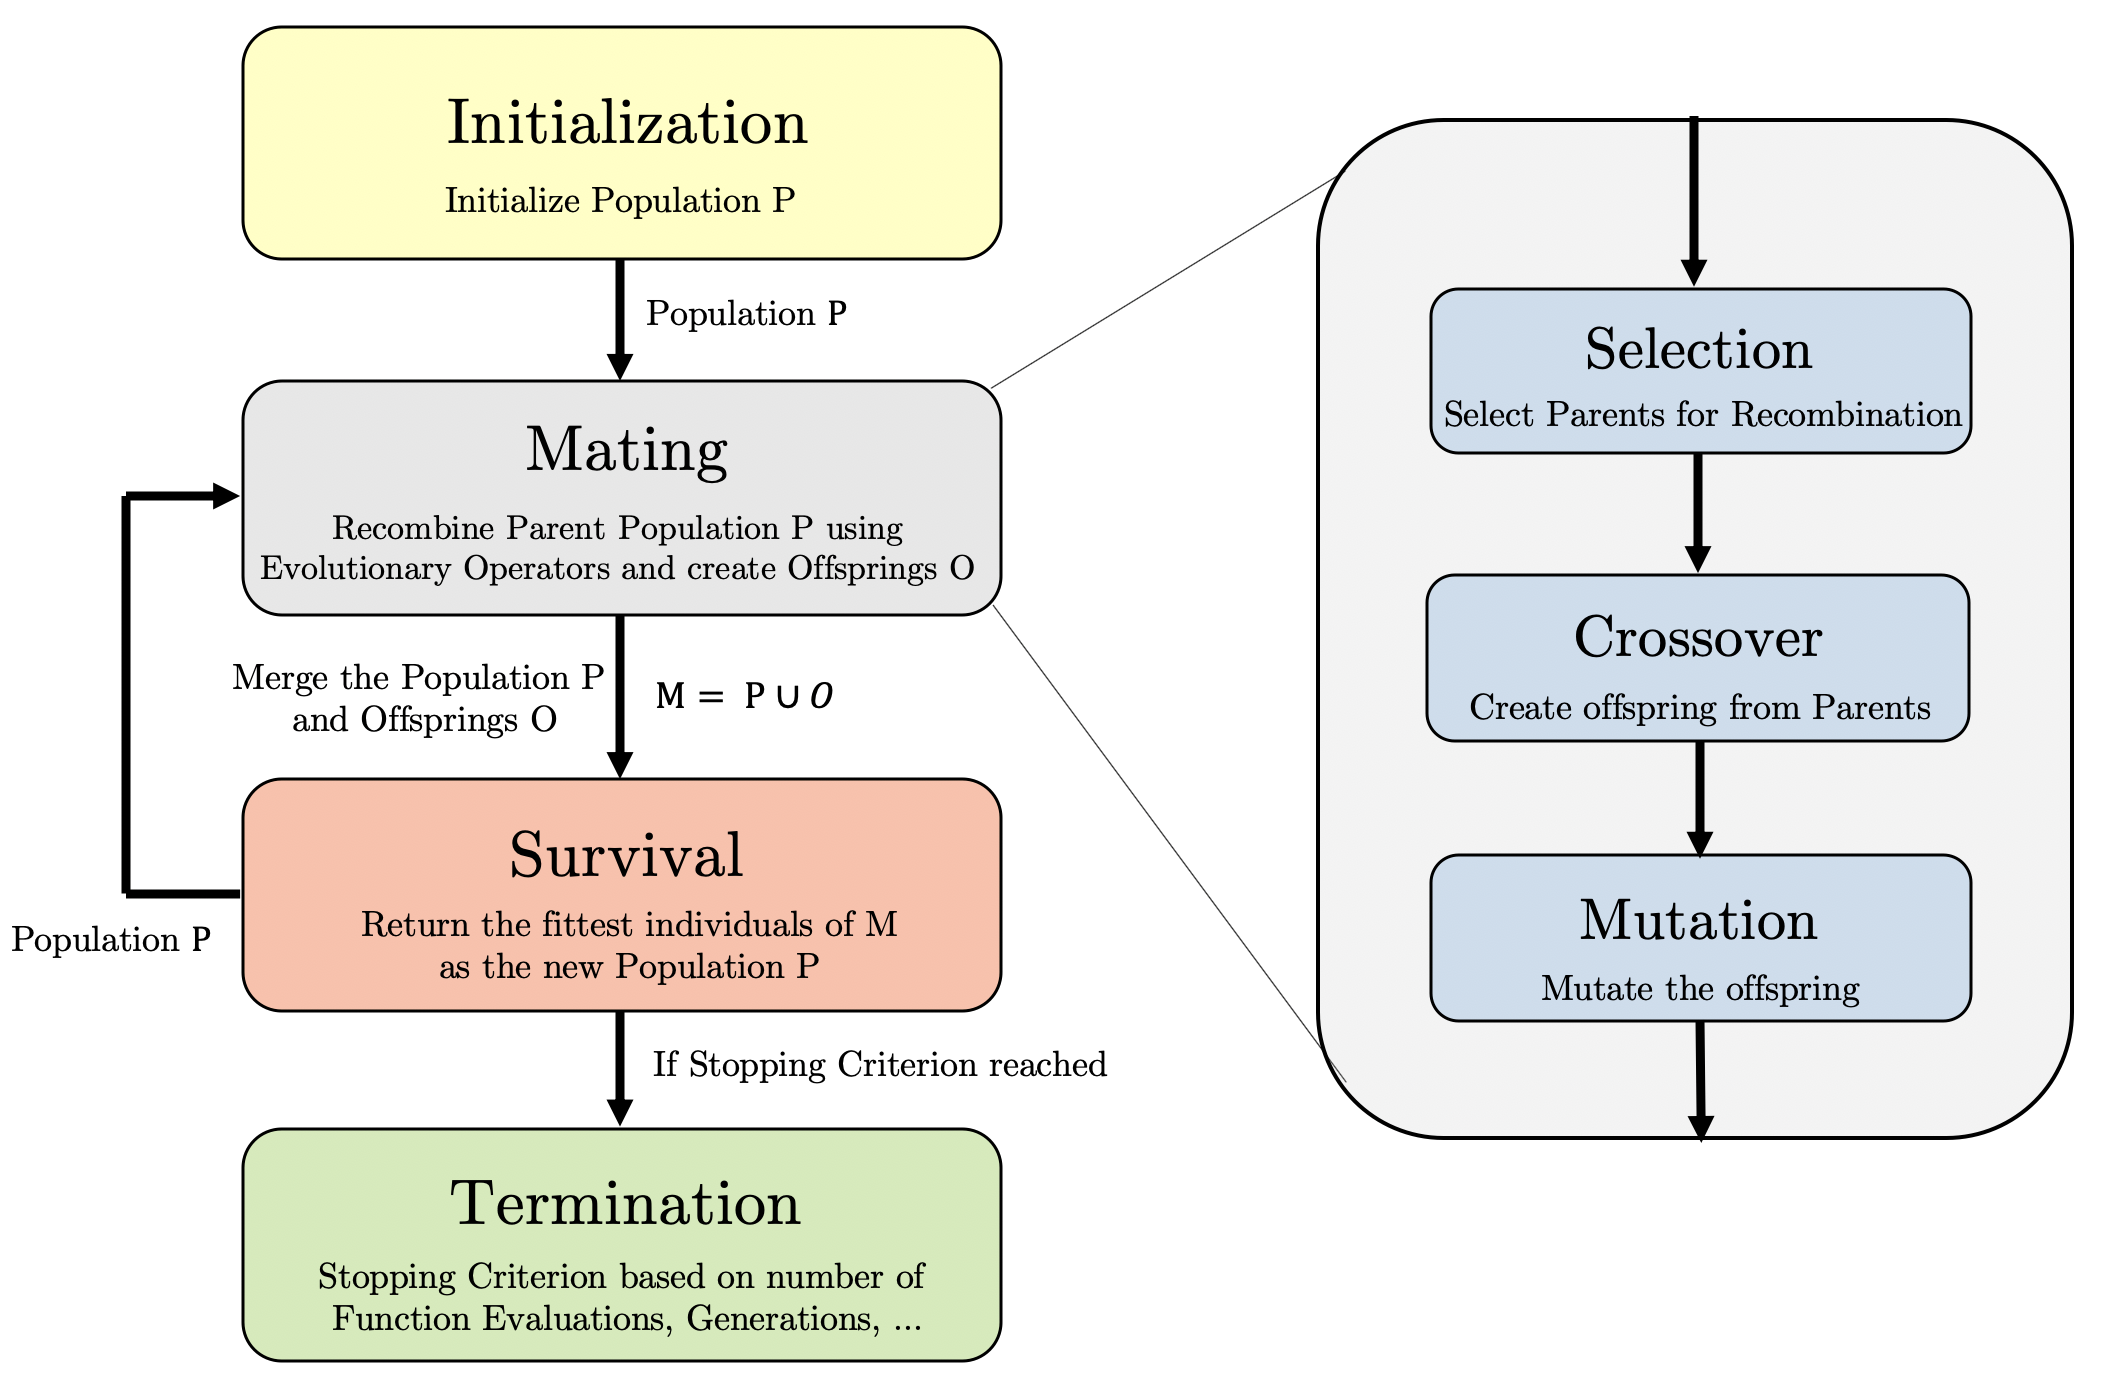

In [ ]:
pip install tpot    #importing tpot, which is used to implement genetic algorithm


In [ ]:
from tpot import TPOTClassifier

**Random Forest Classifier**

In [76]:
# Defining search space
n_estimators = [10, 100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 100, 200, 300, 400, 500]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
criterion = ['entropy','gini']


grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion': criterion}

print(grid)

{'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


In [77]:

tpot_classifier = TPOTClassifier(generations= 5, population_size= 20, offspring_size= 10,
                                 verbosity= 2, early_stop= 10,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': grid}, 
                                 cv = 3, scoring = 'accuracy')
tpot_classifier.fit(x_train,y_train)


Generation 1 - Current best internal CV score: 0.8850137562712413

Generation 2 - Current best internal CV score: 0.8850137562712413

Generation 3 - Current best internal CV score: 0.8870067672462882

Generation 4 - Current best internal CV score: 0.8870067672462882

Generation 5 - Current best internal CV score: 0.8870067672462882

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=entropy, max_depth=500, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200), criterion=gini, max_depth=200, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      100,
                                                                                      200,
                                                                                      300,
                                                                                      400,
                                                                                      500],
                                                                        'max_features': ['auto',
                                                                                         'sqrt',
                                                                    

In [79]:
y_pred_test = tpot_classifier.predict(x_test)

**Accuracy**

In [80]:
accuracy = tpot_classifier.score(x_test, y_test)
print(accuracy)

0.93


**Confusion Matrix**

In [81]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  1  0  0  0  0  0]
 [ 0  0  0 14  0  2  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  2]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 21]]


**Classification Report**

In [82]:
report = classification_report(y_test,pred_y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       0.83      0.94      0.88        16
           3       1.00      0.88      0.93        16
           4       0.96      0.93      0.95        28
           5       0.90      0.95      0.93        20
           6       1.00      0.90      0.95        20
           7       1.00      0.96      0.98        24
           8       1.00      1.00      1.00        10
           9       0.88      1.00      0.93        21

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



**SVM**

In [ ]:
kernel = ['linear', 'poly' , 'rbf']
C = [1,5,10,100]
tol = [0.001, 0.01, 0.1]
gamma = ['scale','auto']

grid_SVM = { 'kernel' : kernel,
            'C': C,
            'tol' : tol,
            'gamma' : gamma} 

In [ ]:
tpot_classifier = TPOTClassifier(generations= 5, population_size= 20, offspring_size= 10,
                                 verbosity= 2, early_stop= 10,
                                 config_dict={'sklearn.svm.SVC': grid_SVM}, 
                                 cv = 3, scoring = 'accuracy')
tpot_classifier.fit(x_train,y_train)


Generation 1 - Current best internal CV score: 0.8980117842393293

Generation 2 - Current best internal CV score: 0.8980117842393293

Generation 3 - Current best internal CV score: 0.8980117842393293

Generation 4 - Current best internal CV score: 0.8980117842393293

Generation 5 - Current best internal CV score: 0.8980117842393293

Best pipeline: SVC(input_matrix, C=10, gamma=scale, kernel=rbf, tol=0.001)


TPOTClassifier(config_dict={'sklearn.svm.SVC': {'C': [1, 5, 10, 100],
                                                'gamma': ['scale', 'auto'],
                                                'kernel': ['linear', 'poly',
                                                           'rbf'],
                                                'tol': [0.001, 0.01, 0.1]}},
               crossover_rate=0.1, cv=3, disable_update_check=False,
               early_stop=10, generations=5, log_file=None,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=10,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=None, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
y_pred_test = tpot_classifier.predict(x_test)

**Accuracy**

In [ ]:
accuracy = tpot_classifier.score(x_test, y_test)
print(accuracy)

0.96


**Confusion Matrix**

In [ ]:
confusionMatrix = confusion_matrix(y_test,pred_y_test)
print(confusionMatrix)

**Classification Report**

In [ ]:
report = classification_report(y_test,pred_y_test)
print(report)

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  1  0  0  0  0  0]
 [ 0  0  0 14  0  2  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  1]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  1]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 21]]
Accuracy Score 0.96
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       0.83      0.94      0.88        16
           3       1.00      0.88      0.93        16
           4       0.96      0.96      0.96        28
           5       0.90      0.95      0.93        20
           6       1.00      0.90      0.95        20
           7       1.00      0.96      0.98        24
           8       1.00      1.00      1.00        10
           9       0.91      1.00      0.95        21

    accuracy                  

# **Bayesion Optimization on Neural Network Model**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.datasets import fashion_mnist
from keras.utils import np_utils


In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

**Loading the fasion MNIST dataSet**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train[:6000]
y_train = y_train[0:6000]
X_test = X_test[0:1000]
y_test = y_test[0:1000]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)
X_train = X_train.reshape(4800, 784)
X_val = X_val.reshape(1200, 784)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test= X_test.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
y_val = np_utils.to_categorical(y_val, nb_classes)

In [ ]:
search_space = {'dense_layer': hp.choice('dense_layer', [128, 256, 512, 1024]),
        'activation': hp.choice('activation', ['relu', 'sigmoid']),
        'dropout': hp.choice('dropout', [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6]),
         'dense_layer2': hp.choice('dense_layer2', [128, 256, 512, 1024]),
         'activation2': hp.choice('activation2', ['relu', 'sigmoid']),
         'dropout2': hp.choice('dropout2', [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6]),
         'layers': hp.choice('layers', ['2', '3']),
         'dense_layer3': hp.choice('dense_layer3', [128, 256, 512, 1024]),
         'activation3': hp.choice('activation3', ['relu', 'sigmoid']),
         'dropout3': hp.choice('dropout3', [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6]),
        'lr' : hp.choice('lr', [10**-3, 10**-2, 10**-1]),
        'optimizer' : hp.choice('optimizer', ['adam', 'sgd', 'rmsprop']),
        'batch_size' : hp.choice('batch_size', [64,128,256])
    }

In [ ]:
def run_model(search_space):

    model = Sequential()

    model.add(Dense(search_space['dense_layer'], activation=search_space['activation'], input_shape=(784,)))
    model.add(Dropout(search_space['dropout']))

    model.add(Dense(search_space['dense_layer2'], activation=search_space['activation2']))
    model.add(Dropout(search_space['dropout2']))
    
    if search_space['layers']== '3':

        model.add(Dense(search_space['dense_layer3'], activation=search_space['activation3']))
        model.add(Dropout(search_space['dropout3']))
         
    model.add(Dense(10,activation='softmax'))
    
    adam = keras.optimizers.Adam(lr=search_space['lr'])
    rmsprop = keras.optimizers.RMSprop(lr=search_space['lr'])
    sgd = keras.optimizers.SGD(lr=search_space['lr'])
   
    optimizer_name = search_space['optimizer']
    if optimizer_name == 'adam':
        optimizer_selected = adam
    elif optimizer_name == 'rmsprop':
        optimizer_selected = rmsprop
    else:
        optimizer_selected = sgd




    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer_selected)
    model.fit(X_train, y_train,
              batch_size=search_space['batch_size'],
              epochs=12,
              verbose=2,
              validation_data=(X_val, y_val))
    score, acc = model.evaluate(X_val, y_val, verbose=1)
    print('Test accuracy:', acc)

    return {'loss': -acc, 'status': STATUS_OK, 'model': model}




In [ ]:
trials = Trials()
best = fmin(fn= run_model,
            space= search_space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)
best

Epoch 1/12
  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")



38/38 - 1s - loss: 2.0685 - accuracy: 0.2506 - val_loss: 1.1751 - val_accuracy: 0.5925

Epoch 2/12
38/38 - 0s - loss: 1.1435 - accuracy: 0.5471 - val_loss: 0.7669 - val_accuracy: 0.7325

Epoch 3/12
38/38 - 0s - loss: 0.8670 - accuracy: 0.6677 - val_loss: 0.6325 - val_accuracy: 0.7608

Epoch 4/12
38/38 - 0s - loss: 0.7538 - accuracy: 0.7119 - val_loss: 0.5508 - val_accuracy: 0.7983

Epoch 5/12
38/38 - 0s - loss: 0.6737 - accuracy: 0.7487 - val_loss: 0.5236 - val_accuracy: 0.8150

Epoch 6/12
38/38 - 0s - loss: 0.6290 - accuracy: 0.7681 - val_loss: 0.4947 - val_accuracy: 0.8183

Epoch 7/12
38/38 - 0s - loss: 0.5825 - accuracy: 0.7881 - val_loss: 0.4970 - val_accuracy: 0.8208

Epoch 8/12
38/38 - 0s - loss: 0.5588 - accuracy: 0.7969 - val_loss: 0.4746 - val_accuracy: 0.8367

Epoch 9/12
38/38 - 0s - loss: 0.5257 - accuracy: 0.8077 - val_loss: 0.4591 - val_accuracy: 0.8392

Epoch 10/12
38/38 - 0s - loss: 0.5135 - accuracy: 0.8067 - val_loss: 0.4476 - val_accuracy: 0.8417

Epoch 11/12
38/38 - 

{'activation': 1,
 'activation2': 0,
 'activation3': 1,
 'batch_size': 1,
 'dense_layer': 2,
 'dense_layer2': 1,
 'dense_layer3': 2,
 'dropout': 8,
 'dropout2': 1,
 'dropout3': 11,
 'layers': 1,
 'lr': 0,
 'optimizer': 0}

# **Genetic algorithm on NN**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train[:6000]
y_train = y_train[0:6000]
X_test = X_test[0:1000]
y_test = y_test[0:1000]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)
X_train = X_train.reshape(4800, 784)
X_val = X_val.reshape(1200, 784)
X_test = X_test.reshape(1000,784)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test= X_test.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255
nb_classes = 10

In [ ]:

import numpy as np
from sklearn.model_selection import RandomizedSearchCV


hidden_layer_sizes=[]


dense_layer=[128, 256, 512, 1024]
for i in dense_layer:
  for j in dense_layer:
    if(random.randint(0,2)==1):   #taking only few combination
      hidden_layer_sizes.append((i,j))

for i in dense_layer:
  for j in dense_layer:
    for k in dense_layer:
      if(random.randint(0,5)==1):  #taking only few combination
        hidden_layer_sizes.append((i,j,k))


activation=['relu','tanh']

solver =['sgd', 'adam']

batch_size=[64,128]

learning_rate_init= [10**-3, 10**-2]





param = {'hidden_layer_sizes': hidden_layer_sizes,
               'activation': activation,
               'solver': solver,
               'learning_rate_init' : learning_rate_init,
               'batch_size' : batch_size
               }
print(param)

{'hidden_layer_sizes': [(1024, 256), (1024, 512), (512, 512, 1024)], 'activation': ['relu', 'tanh'], 'solver': ['sgd', 'adam'], 'learning_rate_init': [0.001, 0.01], 'batch_size': [64, 128]}


In [ ]:
from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 3, population_size= 6, offspring_size= 3,
                                 verbosity= 2, early_stop= 3,
                                 config_dict={'sklearn.neural_network.MLPClassifier': param}, 
                                  scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [78]:
accuracy = tpot_classifier.score(X_test, y_test)
print(accuracy)

0.841
